# IMDB - Embedding with LSTM
> ## NLP(Natural Language Processing)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Import Tensorflow

In [ ]:
import tensorflow

tensorflow.__version__

'2.9.2'

# I. IMDB Data_Set Load & Review

> ## 1) Load IMDB Data_Set

In [ ]:
from tensorflow.keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 1s 0us/step


> ## 2) Original Data Shape

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


> ## 3) Data Length & Frequency

> ### (1) X_train - 리뷰 길이

In [ ]:
import matplotlib.pyplot as plt

print('리뷰 최대 길이 :', max(len(L) for L in X_train))
print('리뷰 평균 길이 :', sum(map(len, X_train))/len(X_train))

리뷰 최대 길이 : 2494
리뷰 평균 길이 : 238.71364


> ### (2) y_train - Frequency(0:부정, 1:긍정)

In [ ]:
import numpy as np

unique_elements, counts_elements = np.unique(y_train, return_counts = True)

print('Label 빈도수:')
print(np.asarray((unique_elements, counts_elements)))

Label 빈도수:
[[    0     1]
 [12500 12500]]


# II. Tensor Transformation

> ## 1) X_train & X_test : (25000, 250)

* .pad_sequences( )
 - (25000, 250)
   - padding = 'pre': 문장의 길이를 250으로 변경하고 앞쪽에 '0'으로 채우기
   - padding = 'post': 문장의 길이를 250으로 변경하고 뒤쪽에 '0'으로 채우기

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, 
                        maxlen = 250, 
                        padding = 'pre')
X_test = pad_sequences(X_test, 
                       maxlen = 250, 
                       padding = 'pre')

X_train.shape, X_test.shape

((25000, 250), (25000, 250))

* Transformation Check

In [ ]:
print(X_train[0][:21])
print(X_train[0][-20:])
print()
print(X_test[0][:21])
print(X_test[0][-20:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  65   16   38 1334   88   12   16  283    5   16 4472  113  103   32
   15   16 5345   19  178   32]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 286  170    8  157   46    5   27  239   16  179    2   38   32   25
 7944  451  202   14    6  717]


> ## 2) y_train & y_test

In [ ]:
y_train = np.asarray(y_train).astype(float)
y_test = np.asarray(y_test).astype(float)

print(y_train[:21])
print()
print(y_test[:21])

[1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]

[0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]


# III. Keras Embedding Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - Embedding Dimension : 32
    - Input_dim: 적용 단어 종류
    - output_dim: 임베딩 차원

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

imdb = models.Sequential()
imdb.add(layers.Embedding(input_dim = 10000, 
                          output_dim = 32))

imdb.add(layers.LSTM(64))
imdb.add(layers.Dense(1, activation = 'sigmoid'))

* 모델 구조 확인

In [ ]:
imdb.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 344,897
Trainable params: 344,897
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [ ]:
imdb.compile(loss = 'binary_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

> ## 3) Model Fit

In [ ]:
%%time

Hist_imdb = imdb.fit(X_train, y_train,
                     epochs = 10,
                     batch_size = 512,
                     validation_data = (X_test, y_test))

Epoch 1/10
49/49 [==============================] - 8s 41ms/step - loss: 0.5971 - accuracy: 0.6932 - val_loss: 0.5360 - val_accuracy: 0.8049
Epoch 2/10
49/49 [==============================] - 1s 29ms/step - loss: 0.4205 - accuracy: 0.8286 - val_loss: 0.4654 - val_accuracy: 0.8156
Epoch 3/10
49/49 [==============================] - 1s 28ms/step - loss: 0.3196 - accuracy: 0.8756 - val_loss: 0.3345 - val_accuracy: 0.8648
Epoch 4/10
49/49 [==============================] - 1s 29ms/step - loss: 0.2752 - accuracy: 0.8939 - val_loss: 0.4593 - val_accuracy: 0.7733
Epoch 5/10
49/49 [==============================] - 1s 29ms/step - loss: 0.2399 - accuracy: 0.9092 - val_loss: 0.3924 - val_accuracy: 0.8282
Epoch 6/10
49/49 [==============================] - 1s 29ms/step - loss: 0.2157 - accuracy: 0.9190 - val_loss: 0.3853 - val_accuracy: 0.8467
Epoch 7/10
49/49 [==============================] - 1s 29ms/step - loss: 0.2024 - accuracy: 0.9248 - val_loss: 0.3126 - val_accuracy: 0.8675
Epoch 8/10
49

> ## 4) 학습 결과 시각화

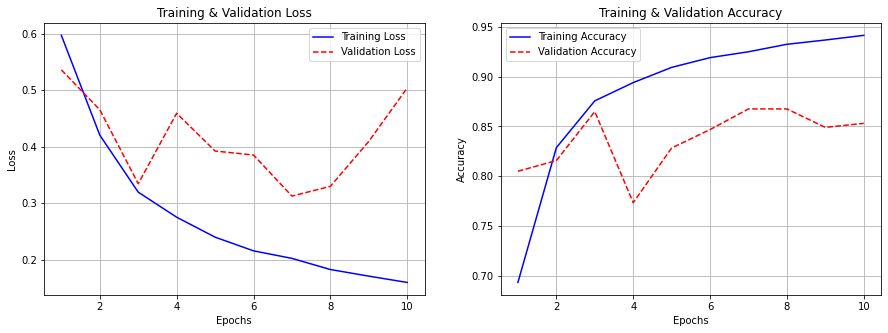

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_imdb.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_imdb.history['loss'], 'b-')
plt.plot(epochs, Hist_imdb.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_imdb.history['accuracy'], 'b-')
plt.plot(epochs, Hist_imdb.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [ ]:
loss, accuracy = imdb.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.50407
Accuracy = 0.85296


# 
# 
# 
# The End
# 
# 
# 